In [1]:
!pip install scikit-learn pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

In [3]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print("Training dataset X:")
print(X)
print("Training dataset Y")
print(Y)

Training dataset X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Text(0, 0.5, '$y$')

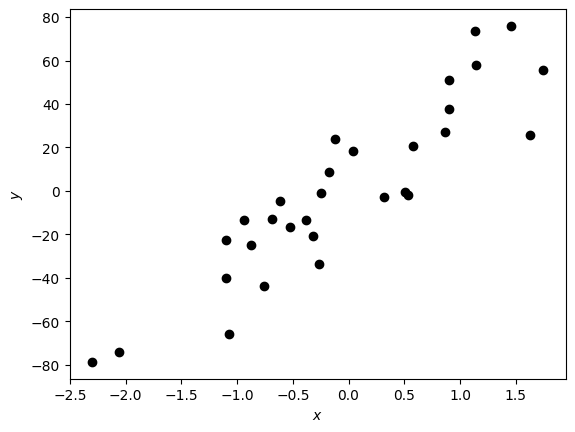

In [4]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [5]:
# Shape of variable X.
shape_X = X.shape
# Shape of variable Y.
shape_Y = Y.shape
# Training set size.
m = shape_X[1]

print("The shape of X: " + str(shape_X))
print("The shape of Y: " + str(shape_Y))
print("I have m = %d training examples!" % (m))

The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!


In [6]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    # Size of input layer.
    n_x = X.shape[0]
    # Size of output layer.
    n_y = Y.shape[0]
    return (n_x, n_y)

In [7]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [8]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """

    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    assert W.shape == (n_y, n_x)
    assert b.shape == (n_y, 1)

    parameters = {"W": W, "b": b}

    return parameters

In [9]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


In [10]:
def forward_propagation(X, parameters, n_y):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output of size (n_y, m)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters.get("W")
    b = parameters.get("b")
    
    # Implement Forward Propagation to calculate Z.
    Z = np.dot(W, X) + b 
    Y_hat = Z
    
    assert(Y_hat.shape == (n_y, X.shape[1]))

    return Y_hat

In [11]:
Y_hat = forward_propagation(X, parameters, n_y)

print(Y_hat)

[[ 0.00570642 -0.01919142  0.01547893 -0.0030841   0.02047485  0.00898776
  -0.04116598 -0.01222935 -0.00686931 -0.01570163 -0.03684826 -0.01968599
  -0.01967297  0.02027892  0.0312082  -0.00219805 -0.01673744  0.0290535
   0.02615168  0.01612611 -0.01361516  0.00948609 -0.00944703 -0.00479152
   0.0104244   0.00075505  0.01611297 -0.00446031 -0.01094205 -0.00576685]]


In [12]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

In [13]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 790.2189412622606


In [14]:
def backward_propagation(A, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    parameters -- python dictionary containing our parameters
    A -- the output of the neural network of shape (1, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]

    # Backward propagation: calculate dW, db.
    dZ = A - Y
    dW = 1 / m * np.matmul(dZ, X.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)

    grads = {"dW": dW, "db": db}

    return grads


def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]

    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]

    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {"W": W, "b": b}

    return parameters


def train_nn(parameters, A, X, Y):
    # Backpropagation. Inputs: "A, X, Y". Outputs: "grads".
    grads = backward_propagation(A, X, Y)

    # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
    parameters = update_parameters(parameters, grads)

    return parameters

In [15]:
parameters = train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[43.63366703]]
b = [[0.17926448]]


In [16]:
def nn_model(X, Y, num_iterations=10, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_y)

    # Loop
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters, n_y". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters, n_y)

        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)

        # Parameters update.
        parameters = train_nn(parameters, Y_hat, X, Y)

        # Print the cost every iteration.
        if print_cost:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [17]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 790.710482
Cost after iteration 1: 176.489429
Cost after iteration 2: 143.769294
Cost after iteration 3: 141.433370
Cost after iteration 4: 141.248724
Cost after iteration 5: 141.233726
Cost after iteration 6: 141.232500
Cost after iteration 7: 141.232400
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]


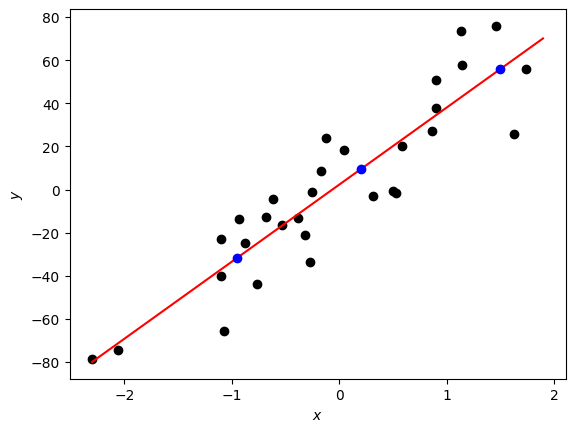

In [18]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

X_line = np.arange(np.min(X[0, :]), np.max(X[0, :]) * 1.1, 0.1)
ax.plot(X_line, W_simple[0, 0] * X_line + b_simple[0, 0], "r")
ax.plot(X_pred, W_simple[0, 0] * X_pred + b_simple[0, 0], "bo")
plt.plot()
plt.show()